In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix 
from lifelines import CoxPHFitter
import pickle 
from lifelines.utils import k_fold_cross_validation
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
mirna_file = 'mirna_final.csv'
mirna_data = pd.read_csv(mirna_file)
mirna_data.set_index('HYBRIDIZATION R',inplace=True)
mirna_data.sort_values(by=["HYBRIDIZATION R"]);

In [3]:
clin_file = 'clinical_final_extra.csv'
clin_data = pd.read_csv(clin_file)
clin_data.set_index('bcr_patient_barcode',inplace=True)
clin_data.sort_values(by=["bcr_patient_barcode"]);

In [4]:
ll = list(mirna_data.index)
for item in ll:
    tc = item[-3:]
    if tc=="-02":
        mirna_data = mirna_data.drop(str(item))

In [5]:
mirna_data.shape

(512, 548)

In [6]:
lll = list(mirna_data.index)
ll_new = []
for item in lll:
    item = item[0:12]
    ll_new.append(item)
mirna_data.index = ll_new

In [7]:
rem_row = list(set(mirna_data.index)^set(clin_data.index))
rem_row

['TCGA-DB-A75M',
 'TCGA-CS-5390',
 'TCGA-R8-A6YH',
 'TCGA-DU-7011',
 'TCGA-DU-7019',
 'TCGA-HT-A74J',
 'TCGA-QH-A6CW']

In [8]:
for x in rem_row:
    if (x in clin_data.index):
        clin_data = clin_data.drop(x)
    if (x in mirna_data.index):
        mirna_data = mirna_data.drop(x)

print(clin_data.shape)
print(mirna_data.shape)

(509, 32)
(509, 548)


In [9]:
X = mirna_data

In [10]:
y = clin_data.loc[:,["OS","OS.time"]]

In [37]:
X_tr = pd.read_csv('opt_knn_mirna.csv')
X_tr = X_tr.drop("Unnamed: 0",axis=1)

In [13]:
random_state=0
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit(X).fit_transform(X))

In [14]:
data_frame = X
data_frame["y"] = y_new
data_frame=shuffle(data_frame)

NameError: name 'y_new' is not defined

In [26]:
my_data_transposed=mirna_data

In [27]:
my_data_transposed["Censor"]=clin_data["OS"]

In [28]:
my_data_transposed["Survival"] = clin_data["OS.time"]

In [29]:
my_data_transposed = my_data_transposed.loc[:,["hsa-let-7e","hsa-let-7f-2","hsa-mir-10b","hsa-mir-1275","hsa-mir-1304","hsa-mir-143","hsa-mir-155","hsa-mir-301b","hsa-mir-3074","hsa-mir-3136","hsa-mir-3158-2","hsa-mir-320a","hsa-mir-3622b","hsa-mir-3678","hsa-mir-3690","hsa-mir-3923","Survival","Censor"]]

In [44]:
y["OS"]
my_data_transposed["Censor"] = y["OS"].values
my_data_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Censor,Survival
0,-4.915864,1.493995,8.586826,4.204005,4.076907,3.048057,-0.148246,-1.972134,-5.377252,1.894484,-0.664626,1.280594,1.057468,10.835922,-3.819390,0,NaN
1,-9.077313,-3.961394,-0.238818,1.805115,0.706320,2.097782,-0.787238,-0.736635,-0.358753,-1.651488,1.272181,-0.619724,-0.324763,0.682308,-1.163721,1,NaN
2,-2.941203,0.419371,-1.349461,-3.027975,-3.041383,0.419032,-1.579487,-0.571337,-0.929458,-3.754172,2.585767,-0.899433,-1.004067,0.827169,-2.833545,1,NaN
3,0.186659,-11.433968,1.933252,3.326151,-0.584119,-1.069664,-0.296174,2.864749,-2.910014,0.912541,-0.030162,-1.654025,1.195801,-1.289345,-1.103131,1,NaN
4,24.096487,-0.896626,-0.127424,-7.573625,-14.505849,1.470364,2.374007,7.693084,-10.732958,8.702893,-4.941028,-5.532653,-1.015892,-3.175128,4.777458,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,-4.890253,0.058186,-2.760989,0.003843,-2.748706,2.123580,1.910167,1.089871,0.267675,1.698832,0.370272,-2.332457,-3.395040,1.346903,0.367340,0,NaN
506,-11.489607,-4.932875,0.722572,3.388389,0.296949,1.047657,0.083222,0.232608,-2.339419,-1.025796,1.967878,-2.141054,0.687050,-1.258726,-2.573240,0,NaN
507,-8.737510,-4.542744,-0.288741,-1.067860,-0.702065,3.804181,-1.291380,1.726220,-2.273811,-2.353011,1.857237,-1.435215,-1.197973,2.339408,-1.490591,0,NaN
508,2.365443,5.258994,-2.536857,-7.878461,-4.483859,2.128648,1.794096,2.501656,1.182721,3.296494,-0.526281,0.077329,-9.194785,2.768910,-1.371476,0,NaN


In [45]:
my_data_transposed = X_tr
my_data_transposed["Censor"] = y["OS"].values
my_data_transposed["Survival"] = y["OS.time"].values
my_data_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Censor,Survival
0,-4.915864,1.493995,8.586826,4.204005,4.076907,3.048057,-0.148246,-1.972134,-5.377252,1.894484,-0.664626,1.280594,1.057468,10.835922,-3.819390,0,3574
1,-9.077313,-3.961394,-0.238818,1.805115,0.706320,2.097782,-0.787238,-0.736635,-0.358753,-1.651488,1.272181,-0.619724,-0.324763,0.682308,-1.163721,1,234
2,-2.941203,0.419371,-1.349461,-3.027975,-3.041383,0.419032,-1.579487,-0.571337,-0.929458,-3.754172,2.585767,-0.899433,-1.004067,0.827169,-2.833545,1,1335
3,0.186659,-11.433968,1.933252,3.326151,-0.584119,-1.069664,-0.296174,2.864749,-2.910014,0.912541,-0.030162,-1.654025,1.195801,-1.289345,-1.103131,1,1106
4,24.096487,-0.896626,-0.127424,-7.573625,-14.505849,1.470364,2.374007,7.693084,-10.732958,8.702893,-4.941028,-5.532653,-1.015892,-3.175128,4.777458,0,1828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,-4.890253,0.058186,-2.760989,0.003843,-2.748706,2.123580,1.910167,1.089871,0.267675,1.698832,0.370272,-2.332457,-3.395040,1.346903,0.367340,0,1320
506,-11.489607,-4.932875,0.722572,3.388389,0.296949,1.047657,0.083222,0.232608,-2.339419,-1.025796,1.967878,-2.141054,0.687050,-1.258726,-2.573240,0,1393
507,-8.737510,-4.542744,-0.288741,-1.067860,-0.702065,3.804181,-1.291380,1.726220,-2.273811,-2.353011,1.857237,-1.435215,-1.197973,2.339408,-1.490591,0,1426
508,2.365443,5.258994,-2.536857,-7.878461,-4.483859,2.128648,1.794096,2.501656,1.182721,3.296494,-0.526281,0.077329,-9.194785,2.768910,-1.371476,0,1147


In [46]:
# print (my_data_transposed)
cph = CoxPHFitter()
cph.fit(my_data_transposed, duration_col='Survival', event_col='Censor', show_progress=True, step_size=0.4)
cph.print_summary()

Iteration 13: norm_delta = 0.00000, step_size = 1.0000, ll = -612.92983, newton_decrement = 0.00000, seconds_since_start = 0.5Convergence completed after 13 iterations.
<lifelines.CoxPHFitter: fitted with 510 total observations, 386 right-censored observations>
             duration col = 'Survival'
                event col = 'Censor'
   number of observations = 510
number of events observed = 124
   partial log-likelihood = -612.93
         time fit was run = 2019-10-15 10:58:55 UTC

---
    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
0   0.00      1.00      0.01           -0.03            0.03                0.97                1.03
1   0.02      1.02      0.02           -0.02            0.07                0.98                1.07
2  -0.01      0.99      0.06           -0.12            0.11                0.88                1.12
3  -0.01      0.99      0.03           -0.06            0.04                0.94                1.04


In [47]:
cph.predict()

AttributeError: 'CoxPHFitter' object has no attribute 'predict'

In [ ]:
pickle.dump(cph, open("cox_model_logistic_output_negpos_penalizer=30.pkl", "wb"))

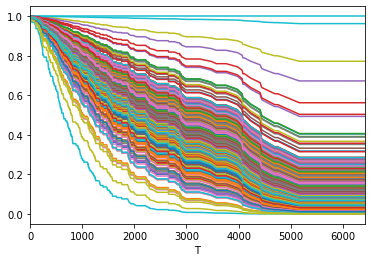

In [48]:
import matplotlib.pyplot as plt
X = my_data_transposed.drop(["Survival", "Censor"], axis=1)
#print (cph.predict_partial_hazard(X))
#print (cph.predict_survival_function(X))
cph.predict_survival_function(X).plot(legend = None)
plt.show()


In [49]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 510 total observations, 386 right-censored observations>
             duration col = 'Survival'
                event col = 'Censor'
   number of observations = 510
number of events observed = 124
   partial log-likelihood = -612.93
         time fit was run = 2019-10-15 10:58:55 UTC

---
    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
0   0.00      1.00      0.01           -0.03            0.03                0.97                1.03
1   0.02      1.02      0.02           -0.02            0.07                0.98                1.07
2  -0.01      0.99      0.06           -0.12            0.11                0.88                1.12
3  -0.01      0.99      0.03           -0.06            0.04                0.94                1.04
4   0.05      1.05      0.03           -0.01            0.10                0.99                1.11
5  -0.04      0.97      0.03           -0.10            0.03        

In [32]:
df_train = my_data_transposed.head(460)
df_test = my_data_transposed.tail(50)

In [33]:
cf = CoxPHFitter()
cf.fit(df_train, duration_col='Survival', event_col='Censor', show_progress=True, step_size=0.3)

Iteration 11: norm_delta = 0.00000, step_size = 1.0000, ll = -509.31087, newton_decrement = 0.00000, seconds_since_start = 0.2Convergence completed after 11 iterations.


<lifelines.CoxPHFitter: fitted with 460 total observations, 342 right-censored observations>

In [34]:
cf.print_summary()

<lifelines.CoxPHFitter: fitted with 460 total observations, 342 right-censored observations>
             duration col = 'Survival'
                event col = 'Censor'
   number of observations = 460
number of events observed = 118
   partial log-likelihood = -509.31
         time fit was run = 2019-10-03 10:20:33 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
hsa-let-7e      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
hsa-let-7f-2    0.00      1.00      0.00            0.00            0.00                1.00                1.00
hsa-mir-10b     0.00      1.00      0.00            0.00            0.00                1.00                1.00
hsa-mir-1275   -0.02      0.98      0.15           -0.31            0.27                0.74                1.30
hsa-mir-1304    0.13      1.13      0.14           -0.14            0.39                0.87                1

In [37]:
cf.predict_expectation(df_test)

,0
TCGA-TM-A84F,1550.068530
TCGA-TM-A84G,4854.462640
TCGA-TM-A84H,4589.790897
TCGA-TM-A84I,1010.688774
TCGA-TM-A84J,1093.202515
TCGA-TM-A84L,3097.755901
TCGA-TM-A84M,3777.495791
TCGA-TM-A84O,1833.740560
TCGA-TM-A84Q,4056.048890
TCGA-TM-A84R,3472.579972


In [38]:
cf.predict_median(df_test)

,0.5
TCGA-TM-A84F,1335.0
TCGA-TM-A84G,inf
TCGA-TM-A84H,5166.0
TCGA-TM-A84I,919.0
TCGA-TM-A84J,962.0
TCGA-TM-A84L,2875.0
TCGA-TM-A84M,4068.0
TCGA-TM-A84O,1525.0
TCGA-TM-A84Q,4229.0
TCGA-TM-A84R,3571.0


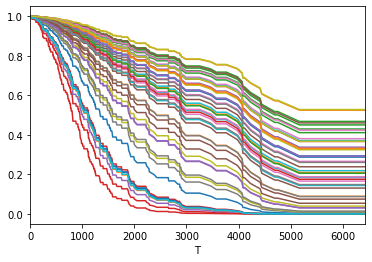

In [41]:
X = df_test.drop(["Survival", "Censor"], axis=1)
df_partial = cph.predict_partial_hazard(X)
df_survival = cph.predict_survival_function(X)
cph.predict_survival_function(X).plot(legend=None)
plt.show()

In [42]:
df_partial = cph.predict_partial_hazard(X)
df_survival = cph.predict_survival_function(X)

In [44]:
df_survival

,TCGA-TM-A84F,TCGA-TM-A84G,TCGA-TM-A84H,TCGA-TM-A84I,TCGA-TM-A84J,TCGA-TM-A84L,TCGA-TM-A84M,TCGA-TM-A84O,TCGA-TM-A84Q,TCGA-TM-A84R,...,TCGA-VW-A8FI,TCGA-W9-A837,TCGA-WH-A86K,TCGA-WY-A858,TCGA-WY-A859,TCGA-WY-A85A,TCGA-WY-A85B,TCGA-WY-A85C,TCGA-WY-A85D,TCGA-WY-A85E
T,,,,,,,,,,,,,,,,,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4752.0,0.005978,0.571903,0.517809,0.000035,0.000148,0.171353,0.317162,0.015801,0.37720,0.231009,...,0.000457,0.383744,0.253856,0.220994,0.049788,0.105670,0.475120,0.191431,0.419797,0.000347
5166.0,0.002721,0.524820,0.467976,0.000007,0.000038,0.130648,0.265829,0.008351,0.32469,0.184411,...,0.000140,0.331198,0.205609,0.175217,0.031391,0.074797,0.423752,0.148464,0.367351,0.000102
5255.0,0.002721,0.524820,0.467976,0.000007,0.000038,0.130648,0.265829,0.008351,0.32469,0.184411,...,0.000140,0.331198,0.205609,0.175217,0.031391,0.074797,0.423752,0.148464,0.367351,0.000102


In [ ]:
df_partial.to_csv(open("abc.csv", "w"))
df_survival.to_csv(open("def.csv", "w"))

In [ ]:
df_survival.to_csv("xyz.csv")
df_partial.to_csv("abc.csv")

In [ ]:
cph.predict_median(X).to_csv("oho.csv")

In [ ]:
data = pickle.load(open("cox_model_logistic_output_negpos_penalizer=0_00001.pkl", "r"))

In [ ]:
df_partial = data.predict_partial_hazard(X)
df_survival = data.predict_survival_function(X)

In [ ]:
df_survival.to_csv("xyz.csv")
df_partial.to_csv("abc.csv")
cph.predict_median(X).to_csv("oho.csv")

In [ ]:
string = "model_"+str(4)+".txt";

In [ ]:
string